In [ ]:
# https://john-analyst.medium.com/pycaret-%EC%BD%94%EB%93%9C-%EB%AA%87-%EC%A4%84%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-18a8de4b6024

In [15]:
# !pip install pycaret

In [3]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 간략한 전처리 도출

In [4]:
from pycaret.classification import *
exp1 = setup(df, target='Survived',
            ignore_features = ['PassengerId'])

,Description,Value
0,session_id,1504
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


# 모델 생성 (여러가지 모델을 다 생성해줌)

In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8363,0.8718,0.6858,0.8748,0.7647,0.6427,0.6571,1.0320
lr,Logistic Regression,0.8314,0.8727,0.7392,0.8168,0.7737,0.6403,0.6446,0.3070
ridge,Ridge Classifier,0.8299,0.0000,0.7310,0.8203,0.7705,0.6364,0.6415,0.0270
rf,Random Forest Classifier,0.8299,0.8587,0.6980,0.8457,0.7632,0.6324,0.6408,0.2210
et,Extra Trees Classifier,0.8235,0.8568,0.6818,0.8406,0.7519,0.6174,0.6264,0.2220
ada,Ada Boost Classifier,0.8170,0.8534,0.7062,0.8098,0.7505,0.6076,0.6144,0.0610
gbc,Gradient Boosting Classifier,0.8154,0.8725,0.6735,0.8235,0.7387,0.5989,0.6079,0.1080
lightgbm,Light Gradient Boosting Machine,0.8057,0.8487,0.7017,0.7840,0.7380,0.5846,0.5890,0.0280
dt,Decision Tree Classifier,0.8042,0.7882,0.7140,0.7803,0.7397,0.5838,0.5904,0.0220
xgboost,Extreme Gradient Boosting,0.8041,0.8453,0.7420,0.7528,0.7459,0.5866,0.5881,0.3920


In [6]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8653,0.7200,0.8571,0.7826,0.6591,0.6653
1,0.8254,0.9042,0.6800,0.8500,0.7556,0.6223,0.6317
2,0.8413,0.8832,0.6800,0.8947,0.7727,0.6542,0.6688
3,0.9194,0.9216,0.8750,0.9130,0.8936,0.8287,0.8292
4,0.8226,0.8761,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8226,0.8322,0.6250,0.8824,0.7317,0.6049,0.6249
6,0.8387,0.9265,0.7917,0.7917,0.7917,0.6601,0.6601
7,0.8065,0.7917,0.5833,0.8750,0.7000,0.5654,0.5908
8,0.8065,0.8541,0.6800,0.8095,0.7391,0.5871,0.5928
9,0.8387,0.8627,0.6400,0.9412,0.7619,0.6465,0.6740


# 모델 튜닝도 알아서 해줌 

In [8]:
# 모델튜닝
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8695,0.7200,0.8571,0.7826,0.6591,0.6653
1,0.8254,0.8968,0.6800,0.8500,0.7556,0.6223,0.6317
2,0.8730,0.8916,0.7600,0.9048,0.8261,0.7273,0.7341
3,0.9194,0.9238,0.8750,0.9130,0.8936,0.8287,0.8292
4,0.8226,0.8794,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8226,0.8246,0.5833,0.9333,0.7179,0.5984,0.6335
6,0.8548,0.9145,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8065,0.7917,0.5833,0.8750,0.7000,0.5654,0.5908
8,0.8387,0.8605,0.7200,0.8571,0.7826,0.6559,0.6622
9,0.8387,0.8670,0.6400,0.9412,0.7619,0.6465,0.6740


# auc그래프랑 confusion_matrix도 그려서 비교해줌

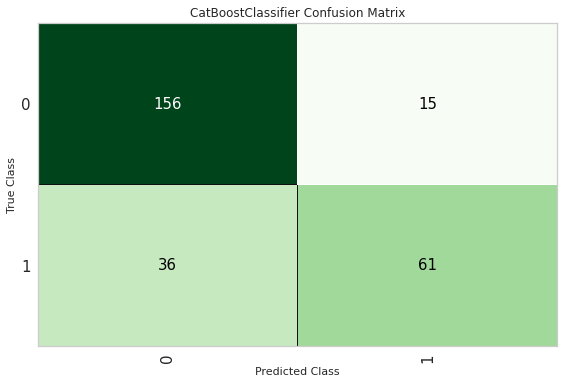

In [16]:
plot_model(estimator = tuned_catboost, plot = 'confusion_matrix')

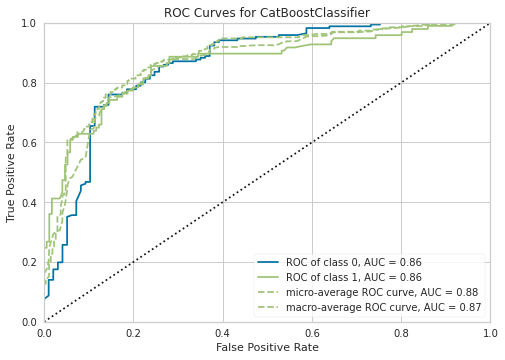

In [17]:
plot_model(estimator = tuned_catboost, plot = 'auc')

# 변수중요도도 확인

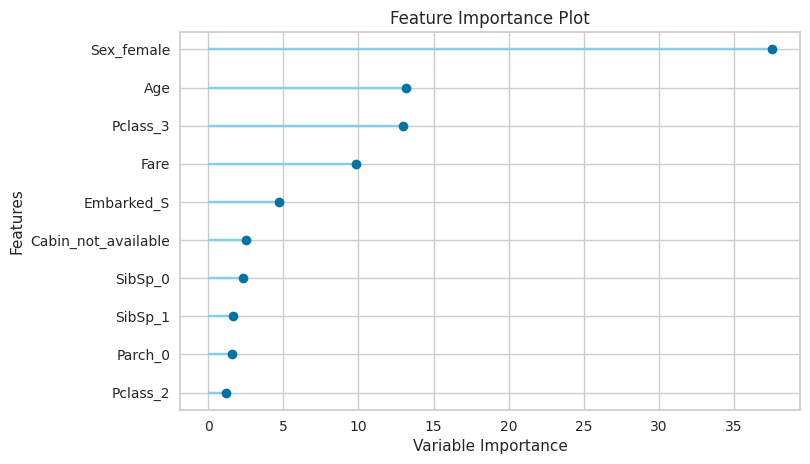

In [10]:
plot_model(estimator = tuned_catboost, plot = 'feature')

# 모델파라미터 확인 

In [11]:
evaluate_model(tuned_catboost)

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,240
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


# test데이터로 결과 도출 

In [19]:
test = pd.read_csv('data/test.csv')
ada_final = finalize_model(tuned_catboost)
predict_model(ada_final,test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8913
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.7776
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9085
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8884
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.5696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.8902
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9779
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9261
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.8902


# 끝!!